# Chapter 9: Classification and Regression Trees

> (c) 2019 Galit Shmueli, Peter C. Bruce, Peter Gedeck
>
> Code included in
>
> _Data Mining for Business Analytics: Concepts, Techniques, and Applications in Python_ (First Edition)
> Galit Shmueli, Peter C. Bruce, Peter Gedeck, and Nitin R. Patel. 2019.

## Import required packages

In [ ]:
%matplotlib inline

from pathlib import Path

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import matplotlib.pylab as plt
!pip install dmba
from dmba import plotDecisionTree, classificationSummary, regressionSummary


## Import and read the data RidingMowers

In [9]:
mower = pd.read_csv("RidingMowers.csv")

In [10]:
mower.head()

,Income,Lot_Size,Ownership
0,60.0,18.4,Owner
1,85.5,16.8,Owner
2,64.8,21.6,Owner
3,61.5,20.8,Owner
4,87.0,23.6,Owner


# Build a Decision Tree with 1 node only

In [11]:
classTree = DecisionTreeClassifier(random_state=1, max_depth=1)
classTree.fit(mower.drop(columns=['Ownership']),mower['Ownership'])

DecisionTreeClassifier(max_depth=1, random_state=1)

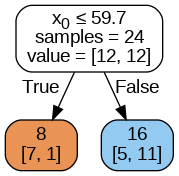

In [12]:
plotDecisionTree(classTree)

[Text(0.5, 0.75, 'x[0] <= 59.7\ngini = 0.5\nsamples = 24\nvalue = [12, 12]'),
 Text(0.25, 0.25, 'gini = 0.219\nsamples = 8\nvalue = [7, 1]'),
 Text(0.75, 0.25, 'gini = 0.43\nsamples = 16\nvalue = [5, 11]')]

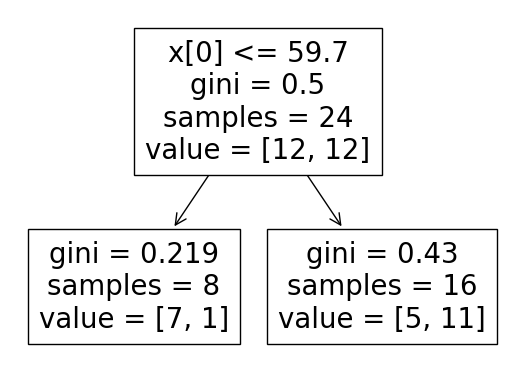

In [13]:
#Code if plotDecisionTree() doesn't work:
from sklearn import tree
tree.plot_tree(classTree)

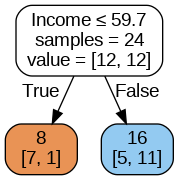

In [14]:
plotDecisionTree(classTree,feature_names=mower.columns[:2])

## Create a decision tree with all the nodes
Grow tree fully

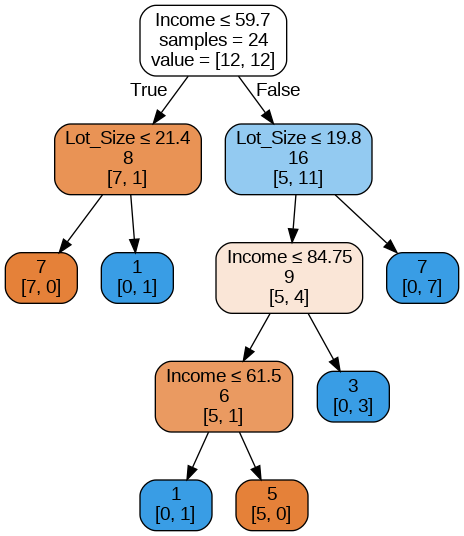

In [15]:
classTree = DecisionTreeClassifier(random_state=1)
classTree.fit(mower.drop(columns=['Ownership']),mower['Ownership'])

plotDecisionTree(classTree,feature_names=mower.columns[:2])

## Universal Bank Data


* import and read the data
* drop Id, Zip vairables from the initial data
* split the data sets into train and validation sets (0.4)
* call and fit a Decision Tree

In [3]:
bank = pd.read_csv("UniversalBank.csv")
bank.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
bank.columns = [ s.strip().replace(' ','_') for s in bank.columns]
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP_Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [5]:
bank=bank.drop(columns=['ID','ZIP_Code'])
bank.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [6]:
X = bank.drop(columns=['Personal_Loan'])
y = bank['Personal_Loan']

train_X, valid_X, train_y, valid_y = train_test_split(X,y, test_size=0.4, random_state=1)

In [7]:
fullClassTree = DecisionTreeClassifier(random_state=1)
fullClassTree.fit(train_X,train_y)

DecisionTreeClassifier(random_state=1)

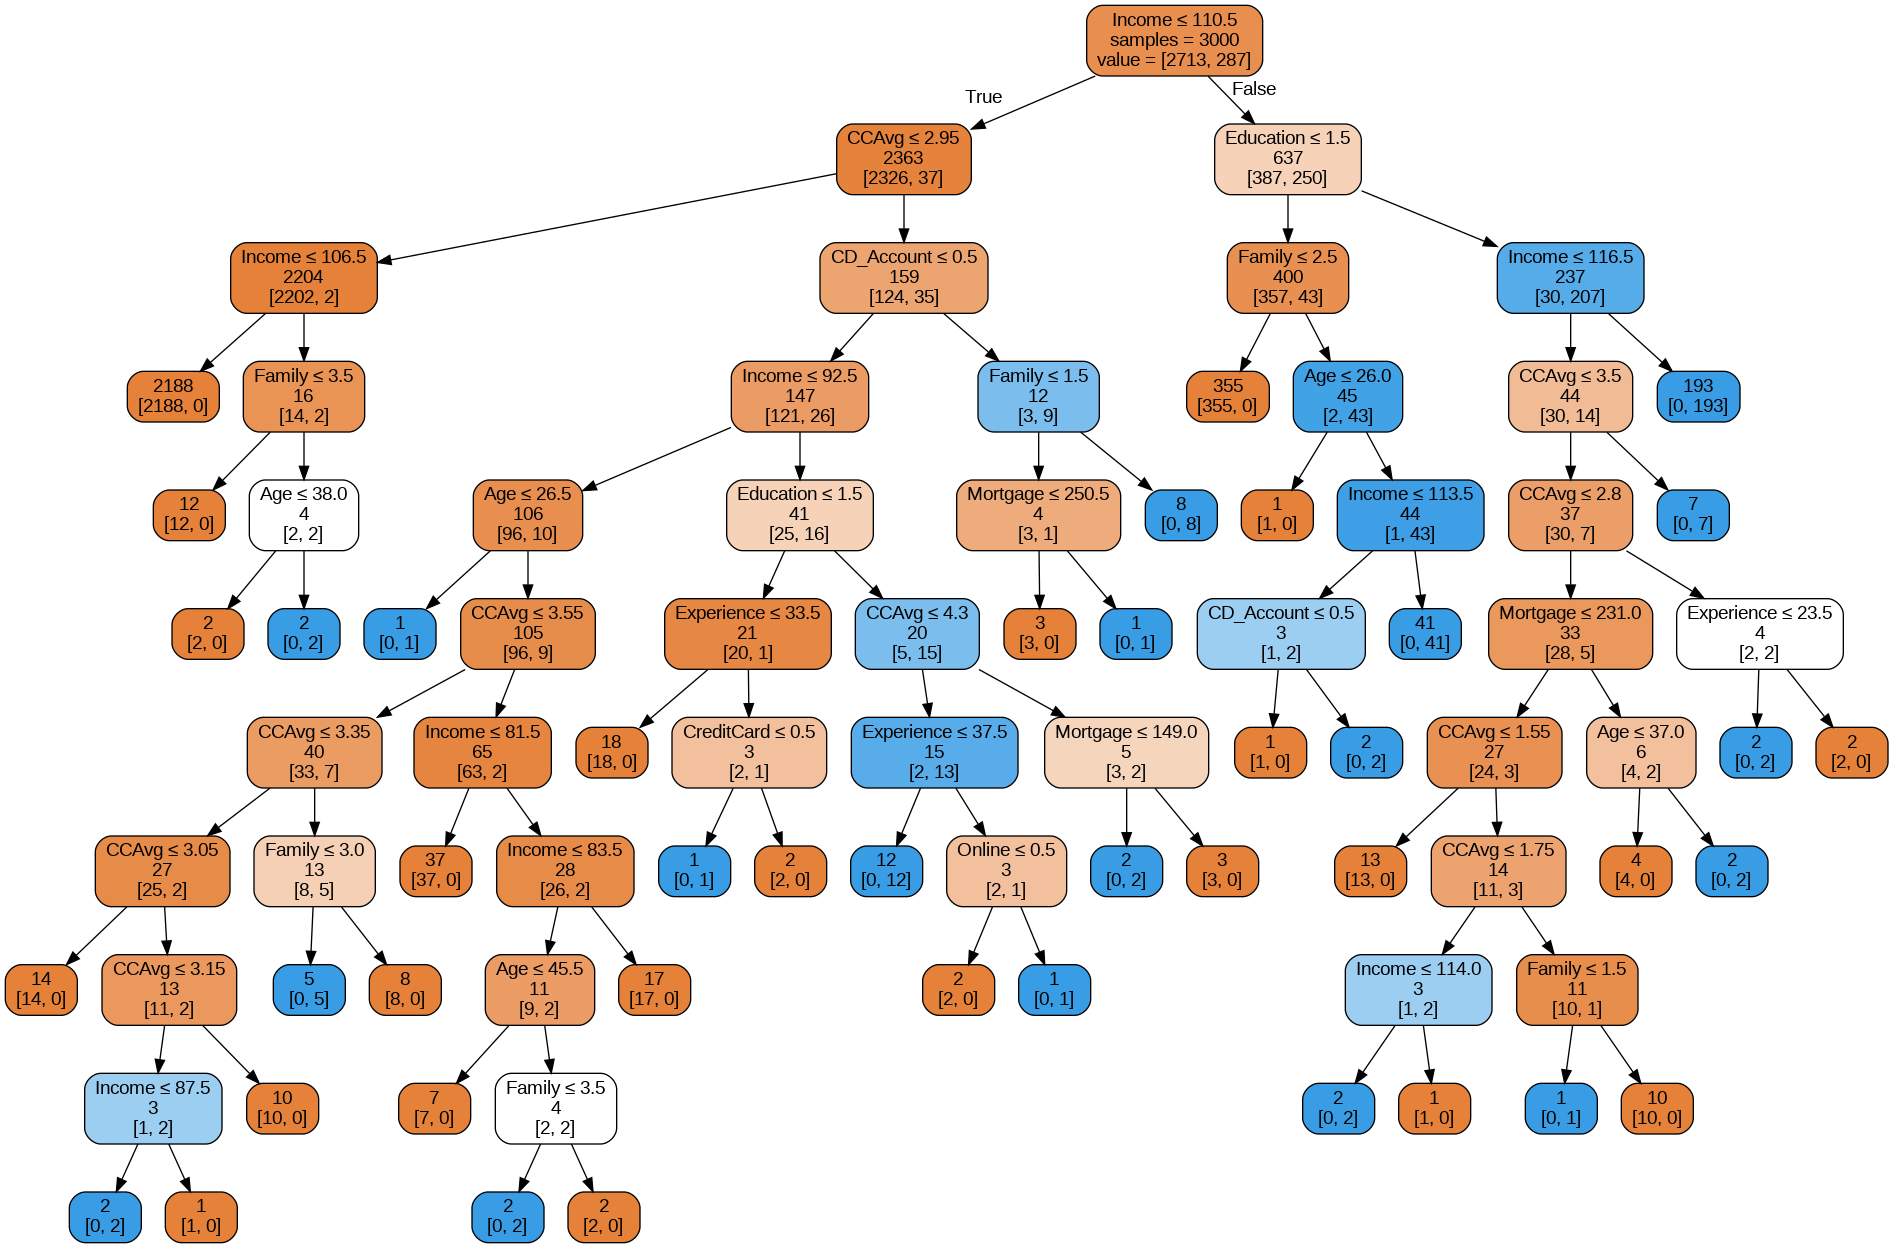

In [8]:
plotDecisionTree(fullClassTree, feature_names=train_X.columns)

In [ ]:
#we don't like trees coz they overfit

## Classfication Summary on the Full Tree
<!-- <div class='alert alert-danger'>R output for reference - remove once missing metrics are available.
```
> confusionMatrix(default.ct.point.pred.train, train.df$Personal.Loan)
Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 2696   26
         1   13  265
                                          
               Accuracy : 0.987           
                 95% CI : (0.9823, 0.9907)
    No Information Rate : 0.903           
    P-Value [Acc > NIR] : < 2e-16         
                                          
                  Kappa : 0.9243          
 Mcnemar's Test P-Value : 0.05466         
                                          
            Sensitivity : 0.9952          
            Specificity : 0.9107          
         Pos Pred Value : 0.9904          
         Neg Pred Value : 0.9532          
             Prevalence : 0.9030          
         Detection Rate : 0.8987          
   Detection Prevalence : 0.9073          
      Balanced Accuracy : 0.9529          
                                          
       'Positive' Class : 0               
```
</div>-->

In [16]:
#in practice never classify accuracy on train:
classificationSummary(train_y,fullClassTree.predict(train_X))
#in practice always classify accuracy on validation (or test):
classificationSummary(valid_y,fullClassTree.predict(valid_X))

Confusion Matrix (Accuracy 1.0000)

       Prediction
Actual    0    1
     0 2713    0
     1    0  287
Confusion Matrix (Accuracy 0.9790)

       Prediction
Actual    0    1
     0 1790   17
     1   25  168


## Controlling for Overfitting using DT

In [17]:
smallClassTree = DecisionTreeClassifier(max_depth=3, random_state=1)
smallClassTree.fit(train_X,train_y)

DecisionTreeClassifier(max_depth=3, random_state=1)

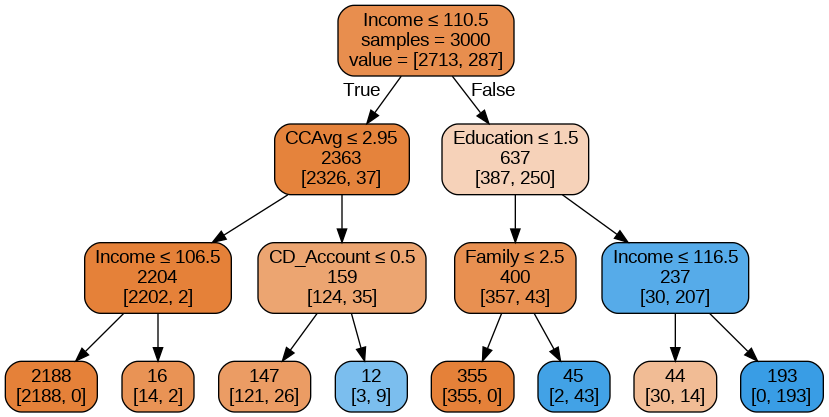

In [18]:
plotDecisionTree(smallClassTree, feature_names=train_X.columns)

In [19]:
classificationSummary(valid_y,smallClassTree.predict(valid_X))

Confusion Matrix (Accuracy 0.9800)

       Prediction
Actual    0    1
     0 1802    5
     1   35  158


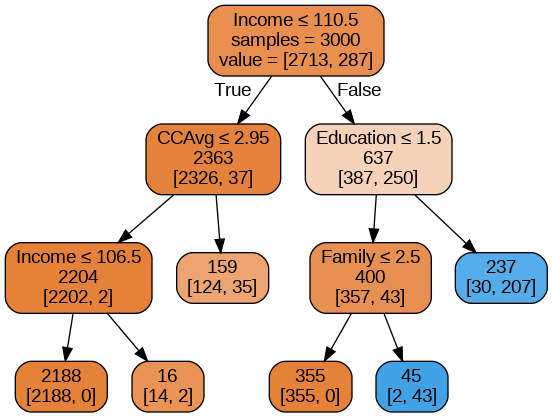

In [26]:
#smallClassTree = DecisionTreeClassifier(max_depth=3, random_state=1, min_samples_split=200)
smallClassTree = DecisionTreeClassifier(max_depth=3, random_state=1, min_samples_split=0.1) #we can have whole number of fractions
smallClassTree.fit(train_X,train_y)
plotDecisionTree(smallClassTree, feature_names=train_X.columns)

In [21]:
classificationSummary(valid_y,smallClassTree.predict(valid_X))

Confusion Matrix (Accuracy 0.9770)

       Prediction
Actual    0    1
     0 1804    3
     1   43  150


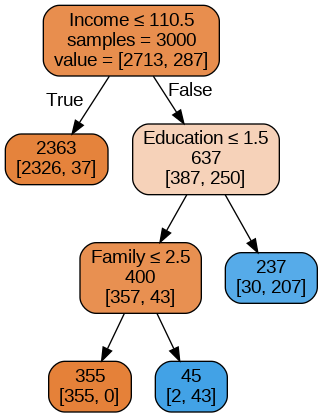

In [31]:
smallClassTree = DecisionTreeClassifier(max_depth=3, random_state=1, min_samples_split=200, min_impurity_decrease=0.02)
smallClassTree.fit(train_X,train_y)
plotDecisionTree(smallClassTree, feature_names=train_X.columns)

In [33]:
classificationSummary(valid_y,smallClassTree.predict(valid_X))
#want the accuracy value to be high enough (though there is no threshold value)
#we can change the numbers: depth search etc.
#we always go for the accuracy
#the tree splits based on the Gini value

Confusion Matrix (Accuracy 0.9760)

       Prediction
Actual    0    1
     0 1791   16
     1   32  161


## Cross Validation
Create a Full DT with cv = 5

In [ ]:
#Google grid search cross validation sklearn and show 5 fold graphic

In [35]:
treeClassifier = DecisionTreeClassifier(random_state=1)
cross_val_score(treeClassifier, train_X, train_y, cv=5)
#best  model is .99333

array([0.98833333, 0.97333333, 0.99333333, 0.98166667, 0.99333333])

## Cross Validation Grid Search


In [37]:
#to check for all combinations; if best model fall at 0.07, we go for 0.1
param_grid = {'max_depth': [2,3,5,10],
              'min_samples_split': [0.07, 0.05, 0.01, 0.005],
              'min_impurity_decrease': [0.05, 0.02, 0.01, 0.001]} #we do all the depth at the same time; 0.07 or 7%; 4x4 models

In [40]:
gridsearch = GridSearchCV( DecisionTreeClassifier(random_state=1), param_grid, cv=5, n_jobs=-1); #cv cross validation
gridsearch.fit(train_X, train_y) #n_jobs default will run all concurrently

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10],
                         'min_impurity_decrease': [0.05, 0.02, 0.01, 0.001],
                         'min_samples_split': [0.07, 0.05, 0.01, 0.005]})

In [42]:
gridsearch.best_score_ #we ran 64 models and the accuracy gave us

0.9866666666666667

In [44]:
gridsearch.best_params_
#best parameter is based on the ff

{'max_depth': 5, 'min_impurity_decrease': 0.001, 'min_samples_split': 0.01}

In [46]:
gridClassTree = DecisionTreeClassifier(random_state=1, max_depth=5,
                                       min_impurity_decrease=0.001, min_samples_split= 0.01)

In [ ]:
#easy way:

In [47]:
gridClassTree.fit(train_X, train_y)

DecisionTreeClassifier(max_depth=5, min_impurity_decrease=0.001,
                       min_samples_split=0.01, random_state=1)

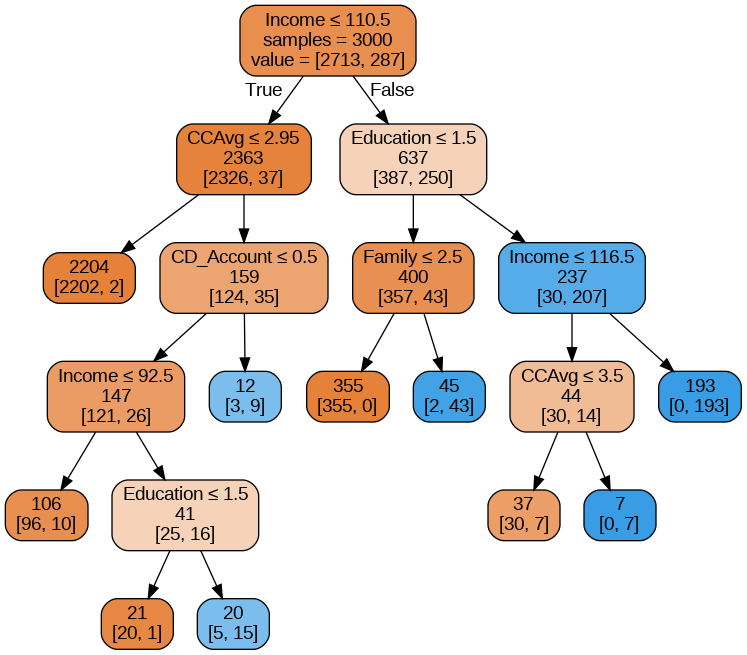

In [54]:
plotDecisionTree(gridClassTree, feature_names=train_X.columns) #to show the name of variables, we use feature names
#interpretation: what is most impt variable - income, then credit card, educ; people who get a loan 100% are income less than 116
#if we interpret 193 will get a loan has an income of more than 116.5 etc...

In [51]:
classificationSummary(train_y,gridClassTree.predict(train_X))

Confusion Matrix (Accuracy 0.9900)

       Prediction
Actual    0    1
     0 2703   10
     1   20  267


In [53]:
classificationSummary(valid_y,gridClassTree.predict(valid_X))
#we have a good model so far

Confusion Matrix (Accuracy 0.9825)

       Prediction
Actual    0    1
     0 1793   14
     1   21  172


##Random Forest

In [ ]:
#cart is binary; chaid is

In [ ]:
#random forests is another way to prevent overfit

Create a Random Forest model on UniversalBank

In [ ]:
#whichever is the most common among all the trees, the majority
#Elements of Statistical Learning book
#bootstrapping - picking randomly multiple times to get the desired number; SAMPLING WITH REPLACEMENT; WHICH TREES RECEIVED MORE VOTES
#bagging - bootstrapping the data plush using the aggregate to make a decision is called bagging - majority
#but we can't determine which is the impt variable/s
#out of bag dataset (or out of boot - or hold out) - compare it with the trees that were generated
#out of bag error

In [57]:
rf = RandomForestClassifier(random_state=1, n_estimators=500) #number of trees 500
rf.fit(train_X, train_y)

RandomForestClassifier(n_estimators=500, random_state=1)

In [62]:
#central limit theorem - getting the mean

rf.feature_importances_  #these values add up to 1

array([0.03625822, 0.0355389 , 0.33375616, 0.11137481, 0.1721052 ,
       0.20077164, 0.03424271, 0.00396363, 0.05791677, 0.0063938 ,
       0.00767817])

               feature  importance       std
7   Securities_Account    0.003964  0.004998
9               Online    0.006394  0.005350
10          CreditCard    0.007678  0.007053
6             Mortgage    0.034243  0.023469
1           Experience    0.035539  0.016061
0                  Age    0.036258  0.015858
8           CD_Account    0.057917  0.043185
3               Family    0.111375  0.053146
4                CCAvg    0.172105  0.103011
5            Education    0.200772  0.101002
2               Income    0.333756  0.129227


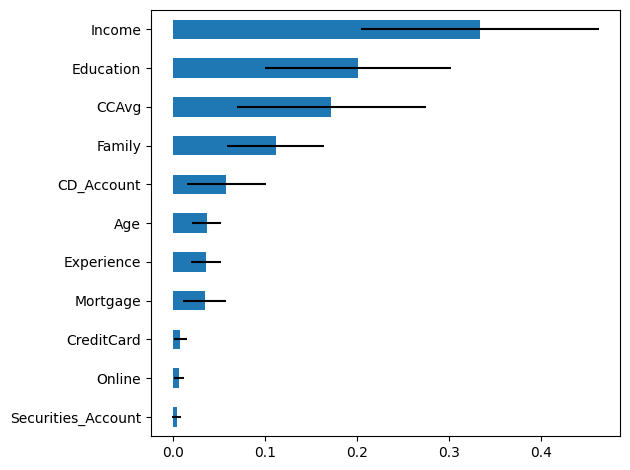

In [69]:
#we took the sd of each of them
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

df = pd.DataFrame({'feature': train_X.columns, 'importance': importances, 'std': std})
df = df.sort_values('importance')
print(df)

ax = df.plot(kind='barh', xerr='std', x='feature', legend=False) #for the bar chart
ax.set_ylabel('')

plt.tight_layout()
plt.show()
#income was the most impt variable based on importance column
#these are just confidence intervals
#random forests less likely to overfit
#income has the most variabiliyt based on std

In [67]:
classificationSummary(valid_y, rf.predict(valid_X)) #pretty good model but less than the previous .9825

Confusion Matrix (Accuracy 0.9820)

       Prediction
Actual    0    1
     0 1803    4
     1   32  161


## Regression Trees

* Create a prediction on toyota corolla prices
* use Age, km, fuel type, hp, met_color, Automatic, CC, doors, tax and weight as predictors

In [70]:
toyota = pd.read_csv("ToyotaCorolla.csv")
toyota.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Id                 1436 non-null   int64 
 1   Model              1436 non-null   object
 2   Price              1436 non-null   int64 
 3   Age_08_04          1436 non-null   int64 
 4   Mfg_Month          1436 non-null   int64 
 5   Mfg_Year           1436 non-null   int64 
 6   KM                 1436 non-null   int64 
 7   Fuel_Type          1436 non-null   object
 8   HP                 1436 non-null   int64 
 9   Met_Color          1436 non-null   int64 
 10  Color              1436 non-null   object
 11  Automatic          1436 non-null   int64 
 12  CC                 1436 non-null   int64 
 13  Doors              1436 non-null   int64 
 14  Cylinders          1436 non-null   int64 
 15  Gears              1436 non-null   int64 
 16  Quarterly_Tax      1436 non-null   int64 


In [71]:
predictors = ['Age_08_04', 'KM', 'Fuel_Type', 'Met_Color', 'Automatic', 'CC',
              'Doors', 'Quarterly_Tax', 'Weight']
outcome = ['Price']

In [72]:
X=pd.get_dummies(toyota[predictors], drop_first=True)
y = toyota[outcome]
train_X, valid_X, train_y, valid_y = train_test_split(X,y, test_size=0.4, random_state=1)

In [73]:
param_grid = {
    'max_depth' : [2, 3, 5, 10, 15, 20, 25],
    'min_samples_split' : [2, 5, 10, 20, 30, 40],
    'min_impurity_decrease' : [0.05, 0.02, 0.01, 0.001, 0.0001, 0.00001]
}

In [75]:
gridsearch = GridSearchCV(DecisionTreeRegressor(random_state=1), param_grid, cv = 5)
gridsearch.fit(train_X, train_y)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=1),
             param_grid={'max_depth': [2, 3, 5, 10, 15, 20, 25],
                         'min_impurity_decrease': [0.05, 0.02, 0.01, 0.001,
                                                   0.0001, 1e-05],
                         'min_samples_split': [2, 5, 10, 20, 30, 40]})

In [83]:
regtree = gridsearch.best_estimator_ #defines the best tree so we don't have to type it like the one on top

In [82]:
#lookt at accuracy
regressionSummary(train_y, regtree.predict(train_X))
regressionSummary(valid_y, regtree.predict(valid_X))

#interpret: model is a bit overfit: MAE AND MAPE
#if you are not sensitve to outliers, we use RMSE ETC. (SEE NOTES towards the end)
#except ME


Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 1032.0072
            Mean Absolute Error (MAE) : 780.4224
          Mean Percentage Error (MPE) : -1.0003
Mean Absolute Percentage Error (MAPE) : 7.6938

Regression statistics

                      Mean Error (ME) : -10.1236
       Root Mean Squared Error (RMSE) : 1229.5573
            Mean Absolute Error (MAE) : 961.5459
          Mean Percentage Error (MPE) : -1.4567
Mean Absolute Percentage Error (MAPE) : 9.6244


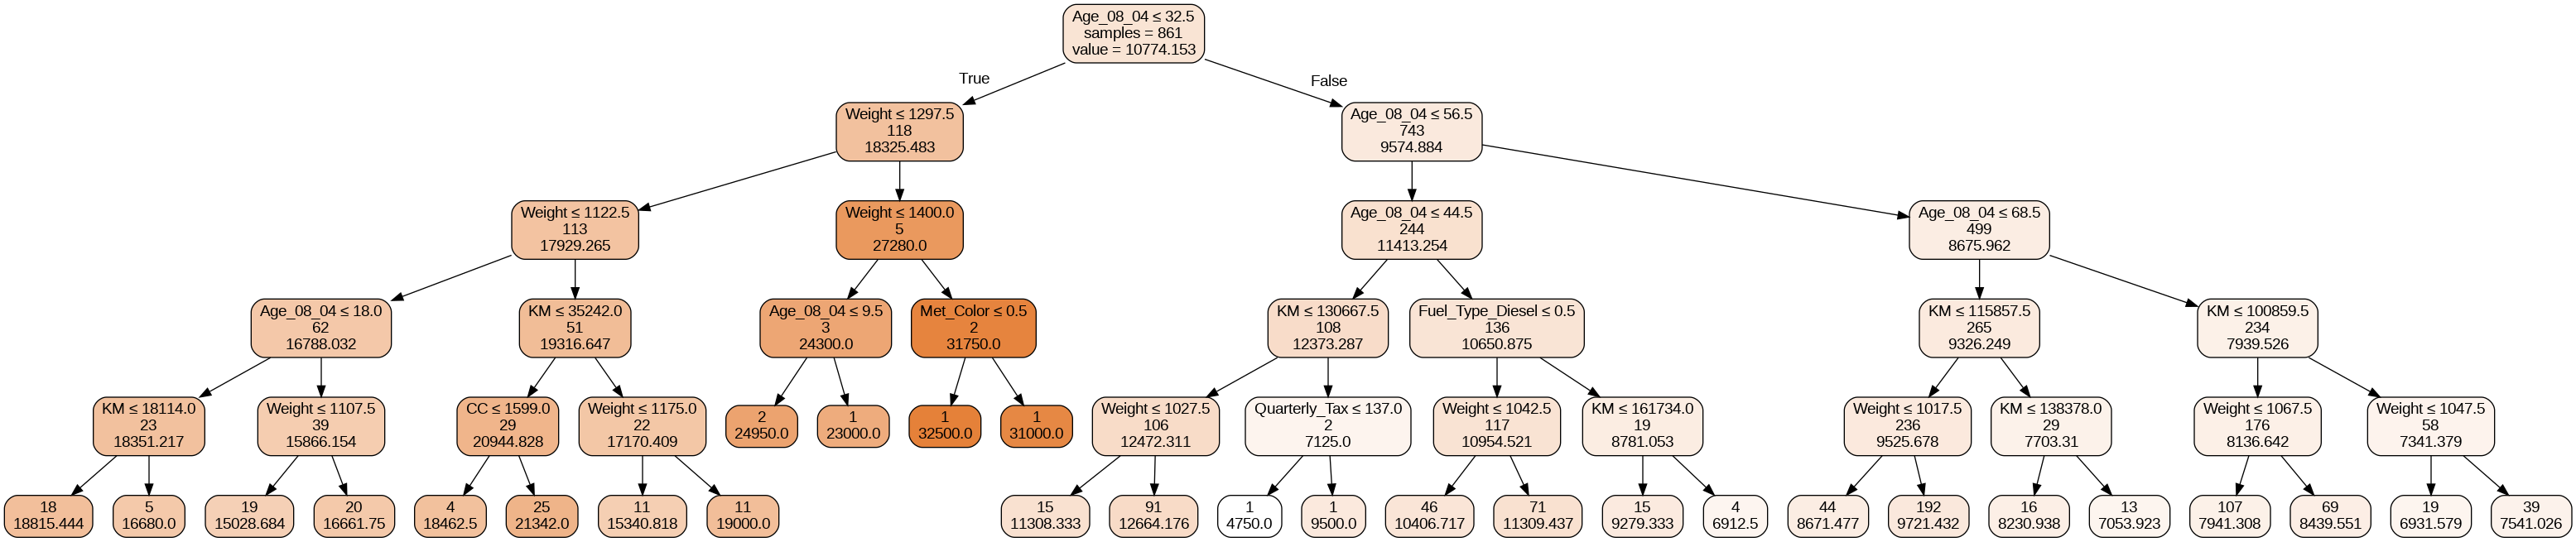

In [86]:
plotDecisionTree(regtree, feature_names=train_X.columns)
#new car with heavy weight price is 27,280
#if Price was 16,661, weight between 1107 and 1122.5, age between 18 etc.